Text(0, 0.5, 'Throughput (mb/s)')

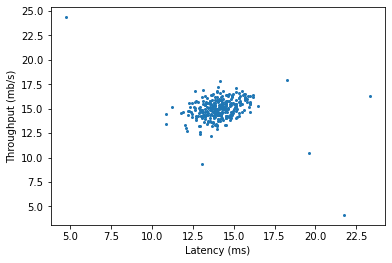

In [45]:
import scipy.io, math
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('ex8data1.mat')
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']
plt.plot(X[:,0],X[:,1],'o',markersize=2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

In [46]:
mean_x = np.mean(X,axis=0)
var_x = np.var(X,axis=0)

In [47]:
def gaussian_pdf(x_data,mu,sigma):
    c = np.sqrt(2*math.pi*sigma)
    ex = (x_data-mu)**2
    ex = ex/(2*sigma)
    return (1/c) * np.exp(ex)
gaussian_pdf(mean_x,mean_x,var_x)

array([0.29469482, 0.30510151])

# Threshold select based on F1 Score

0.2900000000000001

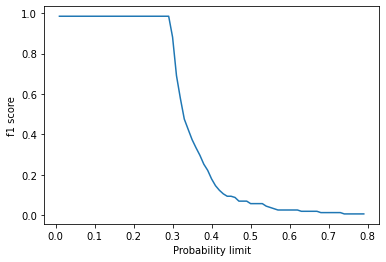

In [138]:
eps_step = 0.01
eps=0
eps_list = []
f1_list = []
while True:
    eps += eps_step
    z = (np.min(gaussian_pdf(Xval,mean_x,var_x),axis=1)<eps)*1
    confusion_mat = np.array([0]*4).reshape(2,2)
    for i,val in enumerate(z):
        confusion_mat[yval[i],z[i]] +=1
    if confusion_mat[0,0]==0:
        break
    acc = np.sum(confusion_mat.diagonal())/np.sum(confusion_mat)
    rec = confusion_mat[0,0]/np.sum(confusion_mat[:,0])
    pre = confusion_mat[0,0]/np.sum(confusion_mat[0,:])
    f1 = 2 * pre * rec/(rec+pre)
    eps_list.append(eps)
    f1_list.append(f1)
plt.plot(eps_list,f1_list)
plt.xlabel('Probability limit')
plt.ylabel('f1 score')
eps_list[28]

In [144]:
z = (np.min(gaussian_pdf(X,mean_x,var_x),axis=1)<0.29)*1
z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1]:
plt.plot(X[:,0],X[:,1],'o',markersize=2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

xlist = np.linspace(5., 30., 100)
ylist = np.linspace(5., 30., 100)
X, Y = np.meshgrid(xlist, ylist)
Z = gaussian_pdf(np.array(X,Y))
plt.contour(X,Y,Z)
plt.plot(X[:,0],X[:,1],'o',markersize=2)

NameError: name 'plt' is not defined